In [5]:
from jax import numpy as jnp
from jax.config import config; config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import sys; sys.path.insert(1, '..')

from algs.train import PG_Trainer, TracePlotter
from env.utils import ExampleMDPs
from env.gridworld import gridplot

### Example training with oracle access to the gradients

In [6]:
mdp = ExampleMDPs.gworld1()
trainer = PG_Trainer(mdp,policy_lr=2,beta=0.1)
optimizers, trace = trainer.train(40)

100%|██████████| 40/40 [00:01<00:00, 39.66it/s]


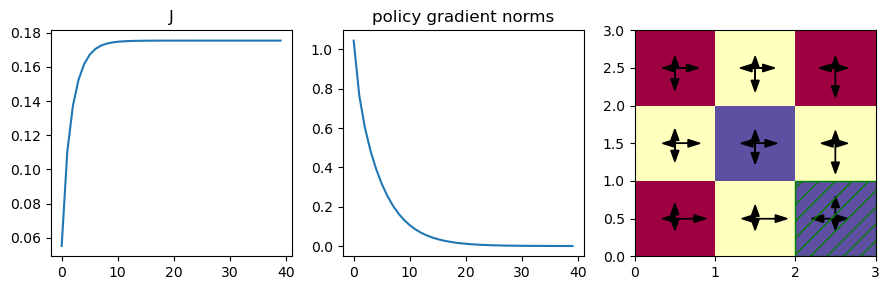

In [7]:
fig, ax = plt.subplots(1,3,figsize=(9,3))
TracePlotter.plotScalar(ax[0],'J',trace)
TracePlotter.plotGradNorms(ax[1],'policy',trace)
gridplot(mdp,ax[2],jnp.sum(mdp.R,axis=1),
            stochastic_policy=trainer.pFun(trace[-1]['params']['policy']),
            goals=mdp.goals)
fig.tight_layout()
plt.show()

### Training with Monte-Carlo gradient estimators